In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import time
import os
import mediapipe as mp

In [2]:
mp_holistic = mp.solutions.holistic 
mp_drawing = mp.solutions.drawing_utils 

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    image.flags.writeable = False                  
    results = model.process(image)                
    image.flags.writeable = True                   
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) 
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) 
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) 
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) 
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) 

In [5]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp _drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 
cap = cv2.VideoCapture(0)

In [6]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        draw_styled_landmarks(image, results)
        cv2.imshow('OpenCV Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('b'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
results.face_landmarks

landmark {
  x: 0.4967154562473297
  y: 0.5360416173934937
  z: -0.023335911333560944
}
landmark {
  x: 0.49430134892463684
  y: 0.49682605266571045
  z: -0.04545765742659569
}
landmark {
  x: 0.49513787031173706
  y: 0.5080544948577881
  z: -0.02300042100250721
}
landmark {
  x: 0.4858570992946625
  y: 0.46086013317108154
  z: -0.03504607826471329
}
landmark {
  x: 0.49387040734291077
  y: 0.48554569482803345
  z: -0.04861430451273918
}
landmark {
  x: 0.49337074160575867
  y: 0.47081080079078674
  z: -0.0455910824239254
}
landmark {
  x: 0.49239814281463623
  y: 0.4357823431491852
  z: -0.02447834238409996
}
landmark {
  x: 0.43381375074386597
  y: 0.43688005208969116
  z: 0.010507154278457165
}
landmark {
  x: 0.49182748794555664
  y: 0.41445261240005493
  z: -0.020558612421154976
}
landmark {
  x: 0.4914920926094055
  y: 0.4006260633468628
  z: -0.023036479949951172
}
landmark {
  x: 0.4898918867111206
  y: 0.34212440252304077
  z: -0.014324658550322056
}
landmark {
  x: 0.49700185

In [8]:
draw_landmarks(frame, results)

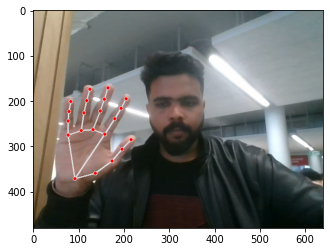

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [10]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [11]:
DATA_PATH = os.path.join('BSL_New')
actions = np.array(["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"])
no_sequences = 20
sequence_length = 35

In [12]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [13]:
label_map = {label:num for num, label in enumerate(actions)}

In [14]:
label_map

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

In [15]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            
            res = res.reshape(res.shape[0],1)
            res = np.concatenate([res,np.zeros((19,1))])
            res = res.reshape((41,41,1))
            
            window.append(res)
        window = np.array(window)
        window = window.transpose(3,0,1,2)
        sequences.append(window)
        labels.append(label_map[action])

In [16]:
x= np.array(sequences)

In [17]:
np.array(labels).shape

(520,)

In [18]:
x.shape

(520, 1, 35, 41, 41)

In [19]:
y = to_categorical(labels).astype(int)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.05)

In [21]:
x_val.shape

(25, 1, 35, 41, 41)

In [22]:
x_train.shape

(469, 1, 35, 41, 41)

In [23]:
x_test.shape

(26, 1, 35, 41, 41)

In [24]:
y_train.shape

(469, 26)

In [25]:
y_test.shape

(26, 26)

In [26]:
y_test

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [27]:
import keras
import numpy as np
import tensorflow as tf
from functools import partial
from tensorflow.keras.layers import (Activation, Conv3D, Dense, Dropout, Flatten,MaxPooling3D, MaxPooling2D)
from keras.layers import LeakyReLU
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import keras

In [29]:
input_x = Input(shape = (1, 35, 41, 41))

initial_conv = Conv3D(16, kernel_size= (3, 3, 3), padding='same')(input_x)
initial_conv = LeakyReLU(alpha=.001)(initial_conv)

initial_conv = Conv3D(32, kernel_size= (3, 3, 3), padding='same')(initial_conv)
initial_conv = LeakyReLU(alpha=.001)(initial_conv)

conv1 = Conv3D(16, kernel_size=(1, 1, 1),padding='same')(initial_conv)
conv1 = LeakyReLU(alpha=.001)(conv1)
conv1 = MaxPooling3D(pool_size=(2, 2, 2), padding='same')(conv1)
conv1 = Conv3D(16, kernel_size=(1, 1, 1),padding='same')(conv1)
conv1 = LeakyReLU(alpha=.001)(conv1)
conv1 = MaxPooling3D(pool_size=(2, 2, 2), padding='same')(conv1)

conv2 = Conv3D(8, kernel_size=(1, 1, 1),padding='same')(initial_conv)
conv2 = LeakyReLU(alpha=.001)(conv2)
conv2 = MaxPooling3D(pool_size=(2, 2, 2), padding='same')(conv2)
conv2 = Conv3D(16, kernel_size=(1, 1, 1),padding='same')(conv2)
conv2 = LeakyReLU(alpha=.001)(conv2)
conv2 = MaxPooling3D(pool_size=(2, 2, 2), padding='same')(conv2)

conv3 = Conv3D(4, kernel_size=(1, 1, 1),padding='same')(initial_conv)
conv3 = LeakyReLU(alpha=.001)(conv3)
conv3 = MaxPooling3D(pool_size=(2, 2, 2), padding='same')(conv3)
conv3 = Conv3D(16, kernel_size=(1, 1, 1),padding='same')(conv3)
conv3 = LeakyReLU(alpha=.001)(conv3)
conv3 = MaxPooling3D(pool_size=(2, 2, 2), padding='same')(conv3)


added = keras.layers.Add()([conv1, conv2, conv3])
added = MaxPooling3D(pool_size=(2, 2, 2), padding='same')(added)
added = Flatten()(added)

dense_1 = Dense(256)(added)
dense_2 = Dense(actions.shape[0],activation='softmax')(dense_1)

model = Model(input_x, dense_2)

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss=categorical_crossentropy,
              optimizer=opt, metrics=['accuracy']) 

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1, 35, 41,   0           []                               
                                41)]                                                              
                                                                                                  
 conv3d (Conv3D)                (None, 1, 35, 41, 1  17728       ['input_1[0][0]']                
                                6)                                                                
                                                                                                  
 leaky_re_lu (LeakyReLU)        (None, 1, 35, 41, 1  0           ['conv3d[0][0]']                 
                                6)                                                            

                                                                                                  
Total params: 162,822
Trainable params: 162,822
Non-trainable params: 0
__________________________________________________________________________________________________


In [30]:
history=model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100)

Epoch 1/100
15/15 [==============================] - 17s 669ms/step - loss: 3.2707 - accuracy: 0.0384 - val_loss: 3.2576 - val_accuracy: 0.0400
Epoch 2/100
15/15 [==============================] - 7s 481ms/step - loss: 3.2429 - accuracy: 0.0448 - val_loss: 3.2484 - val_accuracy: 0.0400
Epoch 3/100
15/15 [==============================] - 5s 347ms/step - loss: 3.1911 - accuracy: 0.0640 - val_loss: 3.0917 - val_accuracy: 0.1600
Epoch 4/100
15/15 [==============================] - 5s 347ms/step - loss: 2.9548 - accuracy: 0.1215 - val_loss: 2.7011 - val_accuracy: 0.2000
Epoch 5/100
15/15 [==============================] - 5s 361ms/step - loss: 2.6013 - accuracy: 0.2047 - val_loss: 2.1402 - val_accuracy: 0.3200
Epoch 6/100
15/15 [==============================] - 5s 350ms/step - loss: 2.1428 - accuracy: 0.3454 - val_loss: 1.6075 - val_accuracy: 0.5600
Epoch 7/100
15/15 [==============================] - 5s 370ms/step - loss: 1.6510 - accuracy: 0.5053 - val_loss: 1.3720 - val_accuracy: 0.520

Epoch 58/100
15/15 [==============================] - 6s 373ms/step - loss: 0.0778 - accuracy: 0.9701 - val_loss: 0.1129 - val_accuracy: 0.9600
Epoch 59/100
15/15 [==============================] - 6s 378ms/step - loss: 0.2235 - accuracy: 0.9275 - val_loss: 1.5123 - val_accuracy: 0.6800
Epoch 60/100
15/15 [==============================] - 5s 357ms/step - loss: 0.6160 - accuracy: 0.8188 - val_loss: 0.2100 - val_accuracy: 0.8800
Epoch 61/100
15/15 [==============================] - 5s 356ms/step - loss: 0.2051 - accuracy: 0.9296 - val_loss: 0.4796 - val_accuracy: 0.8400
Epoch 62/100
15/15 [==============================] - 5s 359ms/step - loss: 0.0669 - accuracy: 0.9787 - val_loss: 0.1832 - val_accuracy: 0.9600
Epoch 63/100
15/15 [==============================] - 5s 354ms/step - loss: 0.0520 - accuracy: 0.9872 - val_loss: 0.1718 - val_accuracy: 0.9200
Epoch 64/100
15/15 [==============================] - 5s 361ms/step - loss: 0.0258 - accuracy: 0.9979 - val_loss: 0.1750 - val_accuracy:

In [31]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [32]:
import matplotlib.pyplot as plt

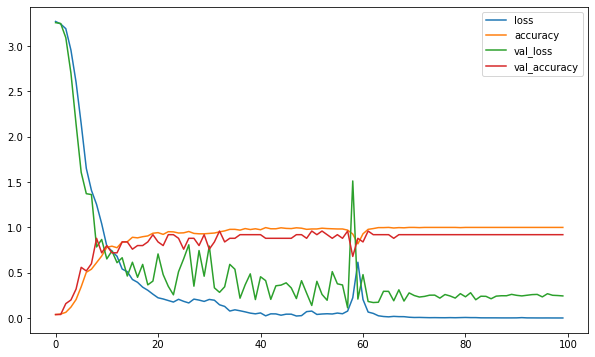

In [33]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.show()

In [35]:
model.predict(x_test)

1/1 [==============================] - 26s 26s/step


array([[1.24024521e-14, 6.57598518e-26, 2.28783837e-19, 4.70276501e-26,
        5.57430024e-13, 7.77874808e-14, 9.38091427e-23, 1.73706611e-12,
        8.37542730e-20, 5.12998920e-17, 5.81486887e-21, 1.47540703e-07,
        7.73408010e-06, 9.46955552e-05, 2.72423533e-14, 1.25748179e-28,
        8.35964747e-04, 1.70674612e-05, 8.58719105e-08, 1.02949002e-06,
        2.94561971e-07, 9.98794794e-01, 2.00173508e-05, 7.09971634e-17,
        1.04476367e-05, 2.17690875e-04],
       [0.00000000e+00, 4.88885975e-24, 2.64215059e-20, 1.89256948e-08,
        1.95121429e-25, 4.15722034e-15, 1.00000000e+00, 7.73931226e-14,
        1.34237057e-08, 3.22121093e-31, 7.68825628e-11, 3.88974666e-32,
        3.79464529e-31, 0.00000000e+00, 1.60571725e-25, 1.28883822e-17,
        1.50886635e-36, 0.00000000e+00, 6.22449895e-19, 5.60412753e-37,
        6.37113971e-33, 9.78316187e-37, 1.52170456e-21, 1.23776300e-09,
        8.45156469e-34, 0.00000000e+00],
       [4.27695231e-16, 4.96675201e-11, 1.11229783e-15

In [36]:
res = model.predict(x_test)

1/1 [==============================] - 3s 3s/step


In [37]:
model.predict(x_train).shape

15/15 [==============================] - 6s 212ms/step


(469, 26)

In [38]:
actions[np.argmax(res[4])]

'V'

In [39]:
actions[np.argmax(y_test[4])]

'V'

In [40]:
model.save('BSL_alphabets_CNN.h5')

In [41]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [42]:
yhat = model.predict(x_test)

1/1 [==============================] - 1s 1s/step


In [43]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [44]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[24,  0],
        [ 0,  2]],

       [[24,  0],
        [ 0,  2]],

       [[24,  0],
        [ 0,  2]],

       [[24,  1],
        [ 0,  1]],

       [[24,  0],
        [ 0,  2]],

       [[25,  0],
        [ 0,  1]],

       [[24,  0],
        [ 0,  2]],

       [[25,  0],
        [ 1,  0]],

       [[24,  2],
        [ 0,  0]],

       [[24,  0],
        [ 2,  0]],

       [[24,  1],
        [ 0,  1]],

       [[23,  0],
        [ 1,  2]],

       [[24,  0],
        [ 0,  2]],

       [[24,  0],
        [ 0,  2]],

       [[24,  0],
        [ 0,  2]],

       [[25,  0],
        [ 0,  1]]], dtype=int64)

In [45]:
accuracy_score(ytrue, yhat)

0.8461538461538461

In [46]:
model = keras.models.load_model('BSL_alphabets_CNN.h5')

In [63]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [64]:
colors = [(245,117,16), (117,245,16), (16,117,245),
         (245,117,16), (117,245,16), (16,117,245),
         (245,117,16), (117,245,16), (16,117,245),
         (245,117,16), (117,245,16), (16,117,245),
         (245,117,16), (117,245,16), (16,117,245),
         (245,117,16), (117,245,16), (16,117,245),
         (245,117,16), (117,245,16), (16,117,245),
         (245,117,16), (117,245,16), (16,117,245),
         (245,117,16), (117,245,16), ]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):  
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [65]:
sequence = []
sentence = []
predictions= []
threshold = 0.85
cap = cv2.VideoCapture(0) 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        ret, frame = cap.read()        
        image, results = mediapipe_detection(frame, holistic)
        draw_styled_landmarks(image, results)
        
        
        res = extract_keypoints(results)
        res = res.reshape(res.shape[0],1)
        res = np.concatenate([list(res),list(np.zeros((19,1)))])
        res = res.reshape((41,41,1))
        
        sequence = list(sequence)
        sequence.append(res)
        sequence = sequence[-35:]
        
        if len(sequence) == 35:
            pre = np.array(sequence)
     
            pre = pre.transpose(3,0,1,2)
        
            res = model.predict(np.expand_dims(pre, axis=0))[0]

            if res[np.argmax(res)] > threshold: 

                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
         
        cv2.imshow('OpenCV Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

1/1 [==============================] - 1s 1s/step


In [66]:
cap.release()
cv2.destroyAllWindows()